In [159]:
import os
os.chdir('C:/Users/KAMAR/Videos/ML')
import warnings
warnings.filterwarnings('ignore')

In [160]:
#Import all the required packages
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
# Load the data set
df= pd.read_csv('Takenmind_Employee.csv')

In [162]:
df.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,Yes
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Yes
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Yes
3,4,0.72,0.87,5,223,5,0,0,sales,low,Yes
4,5,0.37,0.52,2,159,3,0,0,sales,low,Yes


In [163]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.104740,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4330.145106,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,15000.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [164]:
df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Attrition'],
      dtype='object')

In [165]:
df.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
Attrition                 object
dtype: object

In [166]:
#Check If there are any missing values
df.isnull().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
Attrition                False
dtype: bool

In [167]:
df['Attrition'] = df['Attrition'].astype('category')
df['dept'] = df['dept'].astype('category')
df['salary'] = df['salary'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Emp ID                 14999 non-null  int64   
 1   satisfaction_level     14999 non-null  float64 
 2   last_evaluation        14999 non-null  float64 
 3   number_project         14999 non-null  int64   
 4   average_montly_hours   14999 non-null  int64   
 5   time_spend_company     14999 non-null  int64   
 6   Work_accident          14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   dept                   14999 non-null  category
 9   salary                 14999 non-null  category
 10  Attrition              14999 non-null  category
dtypes: category(3), float64(2), int64(6)
memory usage: 982.1 KB


In [168]:
df_numeric = ['satisfaction_level','last_evaluation','number_project','average_montly_hours',
             'time_spend_company','Work_accident','promotion_last_5years']
df_cat =['dept','salary','Attrition']

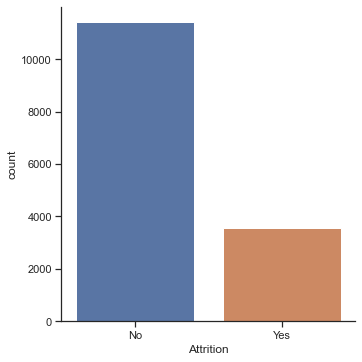

In [169]:
sns.catplot(x="Attrition", kind="count", data=df,orient='h')

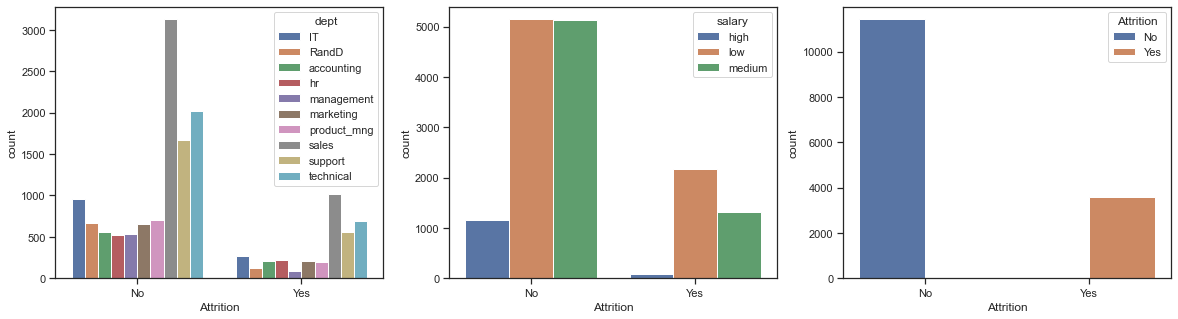

In [170]:
fig , ax = plt.subplots(1,3,figsize=(20,5))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,df_cat):
    sns.countplot(x=df["Attrition"],hue=df[col],ax=axis)

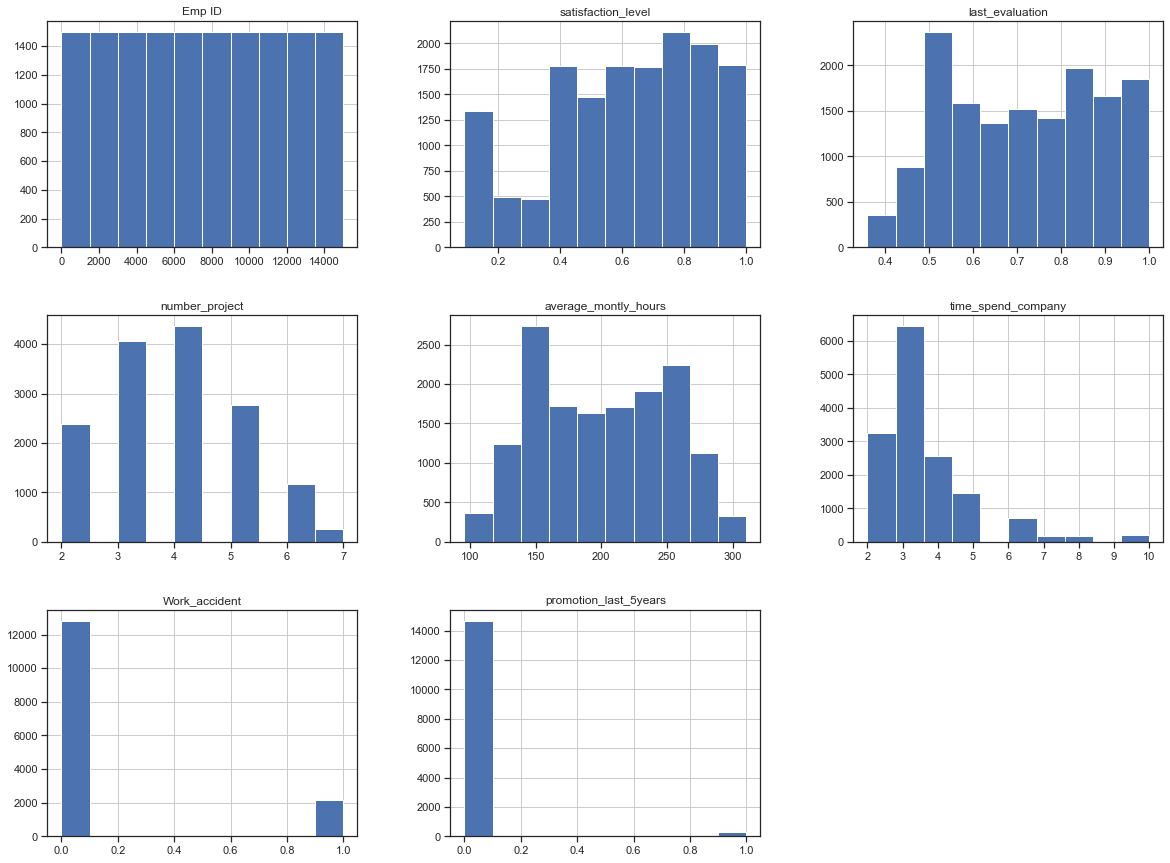

In [171]:
# Visualize the histogram of numerical variables
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("df_existing_histogram_plots.png")
plt.show()

In [172]:
#conversion of categorical to numerical
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [173]:
df['Attrition']=le.fit_transform(df['Attrition'])
df['dept']=le.fit_transform(df['dept'])
df['salary']=le.fit_transform(df['salary'])

In [174]:
df.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,1,0.38,0.53,2,157,3,0,0,7,1,1
1,2,0.80,0.86,5,262,6,0,0,7,2,1
2,3,0.11,0.88,7,272,4,0,0,7,2,1
3,4,0.72,0.87,5,223,5,0,0,7,1,1
4,5,0.37,0.52,2,159,3,0,0,7,1,1


Text(0.5, 1.0, 'correlation matrix')

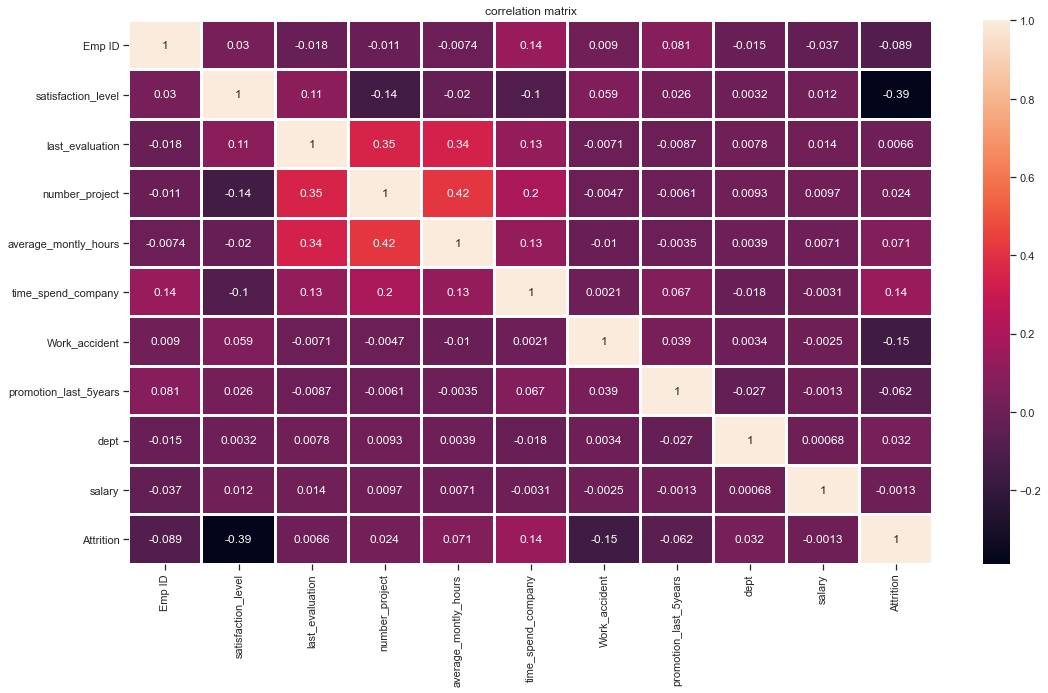

In [175]:
corr_matrix=df.corr()
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(corr_matrix,linewidths=2.0,ax=ax,annot=True)
ax.set_title('correlation matrix')

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X = df.drop(['Emp ID','Attrition'], axis=1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

In [182]:
y_test=df['Attrition']
X_test=df[['average_montly_hours','number_project','last_evaluation','satisfaction_level', 'time_spend_company']]
y_train=df['Attrition']
X_train=df[['satisfaction_level', 'time_spend_company', 'Work_accident']]

In [183]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [184]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix, f1_score,roc_curve, roc_auc_score
def perfomance_record(clf):
    pred = clf.predict(X_test) 
    print("accuracy score",(100*accuracy_score(y_test,pred)))
    print("precision score",(100*precision_score(y_test,pred)))
    print("recall score", (100*recall_score(y_test,pred)))
    print("f1 score", (100*f1_score(y_test,pred, average="micro")))
    print("confusion matrix", confusion_matrix(y_test,pred))
    fpr, tpr, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc_score_ = roc_auc_score(y_test,pred)
    print("roc value",roc_auc_score_)
    plt.figure()
    plt.plot(fpr,tpr, label="Roc_AUC_score (area = %0.2f)" %roc_auc_score_)
    plt.plot([0,1],[0,1], "r--")
    plt.xlabel('True postive rate')
    plt.ylabel('False Postive rate')
    plt.legend(loc="lower right")

accuracy score 97.05980398693245
precision score 96.19244391971665
recall score 91.2629515541865
f1 score 97.05980398693245
confusion matrix [[11299   129]
 [  312  3259]]
roc value 0.9506707255693224


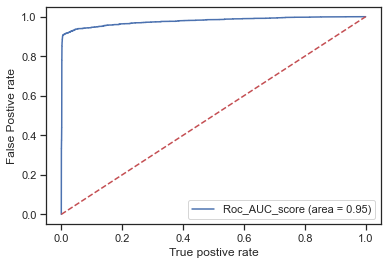

In [185]:
#SVM
from sklearn.svm import SVC
clf_s = SVC(kernel='rbf',probability=True)
clf_s.fit(X_train, y_train)
perfomance_record(clf_s)